**These are suggestions for the solutions to the exercises. They can be solved in a wide variety of ways. Most importantly, you learn something by trying.**

Set up all required installs and imports to start backtesting.

In [3]:
import talib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import datetime

Download data for AMZN in 1min resolution. If you get an error, be sure to read the messages.

In [21]:
start = datetime.datetime.now() - datetime.timedelta(7)
end = datetime.datetime.now()

df = yf.download('AMZN', start=start, end=end, interval='1m')
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Datetime,,,,,
2024-12-16 14:30:00+00:00,230.949997,231.080002,229.440002,230.229996,1545574
2024-12-16 14:31:00+00:00,231.639999,231.849899,230.929993,230.929993,347193
2024-12-16 14:32:00+00:00,231.729996,232.080002,231.199997,231.699997,284793
2024-12-16 14:33:00+00:00,231.350494,231.929993,231.250000,231.800003,178602
2024-12-16 14:34:00+00:00,231.020004,231.369995,230.830002,231.350006,162560
...,...,...,...,...,...
2024-12-20 20:55:00+00:00,225.014999,225.490005,225.014999,225.130005,283848
2024-12-20 20:56:00+00:00,224.960007,225.179901,224.869995,225.009995,231553


Now download Facebook daily data starting 2001.
Change the lecture backtest to run a long/short moving average crossover strategy for Facebook.

[*********************100%***********************]  1 of 1 completed


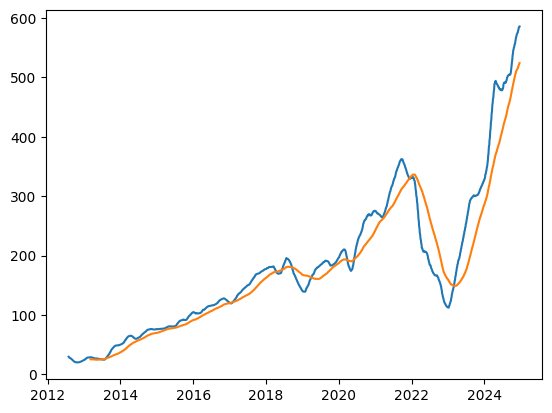

In [25]:
start = '2001-01-01'  # datetime.datetime.now() - datetime.timedelta(7)
end = datetime.datetime.now()

df = yf.download('META', start=start, end=end)
fb = df['Close']['META']
ma50 = talib.SMA(fb, 50)
ma200 = talib.SMA(fb, 200)

plt.plot(ma50)
plt.plot(ma200)
plt.show()

sell None
buy -0.622102649137828
sell 2.149017781234119
buy -0.05599228300385465
sell 0.26480944393094996
buy -0.16726327039451303
sell -0.13711005439552754
buy -0.04529553042545709
sell -0.09651948214259393
buy -0.46795092790970005
sell 0.43269880204576394
buy 0.4707202041149823


/tmp/ipykernel_21547/2690715101.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (ma50[i] - ma200[i]) > 0 and (ma50[i-1] - ma200[i-1]) < 0:
/tmp/ipykernel_21547/2690715101.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (ma50[i] - ma200[i]) < 0 and (ma50[i-1] - ma200[i-1]) > 0:


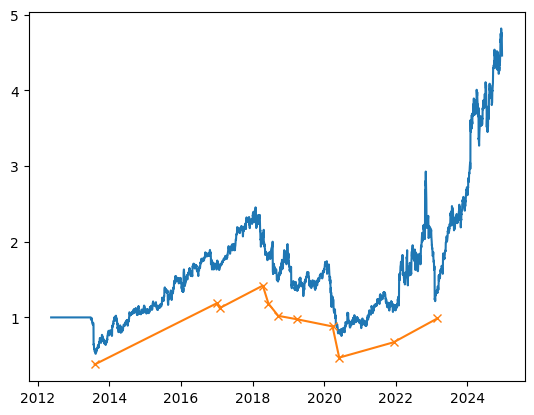

In [26]:



entry = None
pnl = None
pnls = []
dates = []
unrlzd = []
unrlzd_dates = []
hold_times = []
inpos = 0
for i in range(len(fb)):
    unr = (fb.iloc[i] - fb.iloc[i-1])/fb.iloc[i-1] * inpos
    unrlzd.append(unr)
    unrlzd_dates.append(fb.index[i]
                        )
    if (ma50[i] - ma200[i]) > 0 and (ma50[i-1] - ma200[i-1]) < 0:
        if entry:
            pnl = (entry - fb.iloc[i])/entry
            pnls.append(pnl)
            dates.append(fb.index[i])
            hold_times.append((fb.index[i] - start).total_seconds())
        entry = fb.iloc[i]
        inpos = 1
        start = fb.index[i]
        print("buy", pnl)
    elif (ma50[i] - ma200[i]) < 0 and (ma50[i-1] - ma200[i-1]) > 0:
        if entry:
            pnl = (fb.iloc[i] - entry)/entry
            pnls.append(pnl)
            dates.append(fb.index[i])
            hold_times.append((fb.index[i] - start).total_seconds())
        entry = fb.iloc[i] 
        inpos = -1
        start = fb.index[i]
        print("sell", pnl)

plt.plot(unrlzd_dates, np.nancumprod([1+x for x in unrlzd]))
plt.plot(dates, np.nancumprod([1+x for x in pnls]), '-x')

Build a single function to calculate all the metrics, print them with names to an accuracy of 3 decimal places and returns them in an array.

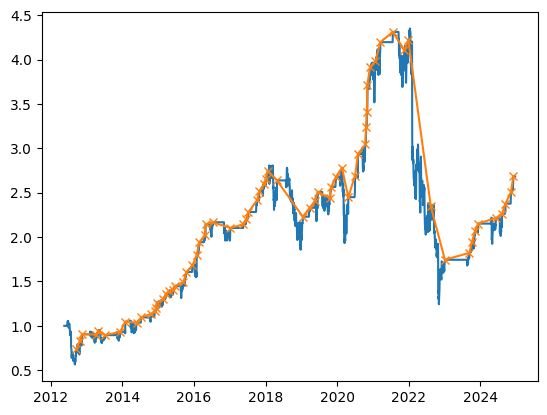

Average Holding Time: 29.32
average profit per trade: 0.02
annualized rar: 0.41


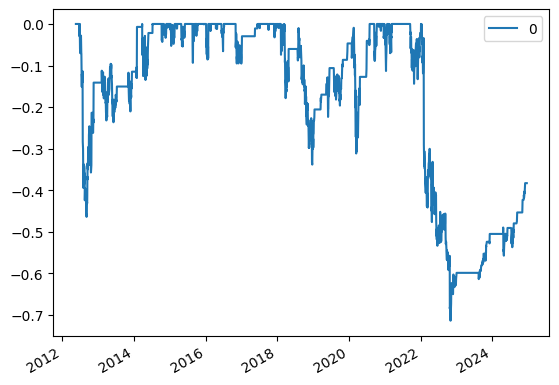

In [41]:
def analytics(dates, pnls, unrlzd_dates, unrlzd):
    plt.plot(unrlzd_dates, np.nancumprod([1+x for x in unrlzd]))
    plt.plot(dates, np.nancumprod([1+x for x in pnls]), '-x')
    plt.show()
    hold_days = np.array(hold_times)/86400
    av_hold_tm = np.mean(hold_days)
    print(f"Average Holding Time: {av_hold_tm:.2f}")

    ppt = np.mean(pnls)
    print(f"average profit per trade: {ppt:.2f}")
    rar = np.nanmean(unrlzd)/np.nanstd(unrlzd) * np.sqrt(252)
    print(f'annualized rar: {rar:.2f}')
    df_rets = pd.DataFrame(unrlzd, index=unrlzd_dates)
    df_pnl = (1 + df_rets).cumprod()
    (df_pnl/df_pnl.expanding().max() - 1).plot()

analytics(dates, pnls, unrlzd_dates, unrlzd)

Use TA-Lib to develop a new trading strategy based on the Relative Strength Index. How many parameters does your strategy use?

<Axes: xlabel='Date'>

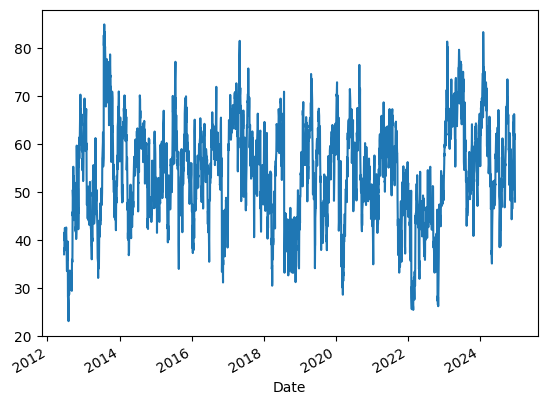

In [35]:
rsi = talib.RSI(fb, 20)
rsi.plot()

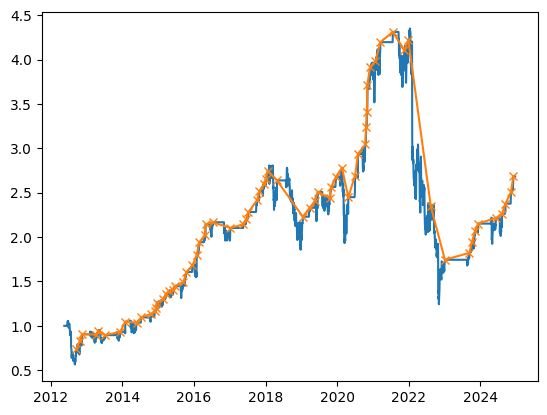

Average Holding Time: 29.32
annualized rar: 0.41


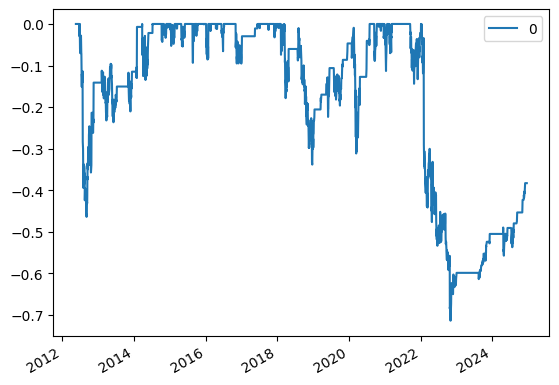

In [40]:
entry = None
pnl = None
pnls = []
dates = []
unrlzd = []
unrlzd_dates = []
hold_times = []
inpos = 0
for i in range(len(fb)):
    unr = (fb.iloc[i] - fb.iloc[i-1])/fb.iloc[i-1] * inpos
    unrlzd.append(unr)
    unrlzd_dates.append(fb.index[i])
    if inpos == 0 and rsi.iloc[i] < 50:
        # enter when index is less than 50
        entry = fb.iloc[i]
        inpos = 1
        start = fb.index[i]
    elif inpos == 1 and rsi.iloc[i] > 55:
        # exit when index is greater than 55
        pnl = (fb.iloc[i] - entry)/entry
        pnls.append(pnl)
        inpos = 0
        dates.append(fb.index[i])
        hold_times.append((fb.index[i] - start).total_seconds())

analytics(dates, pnls, unrlzd_dates, unrlzd)

Add a stop-loss condition to your strategy where you exit if the loss exceeds x percent.

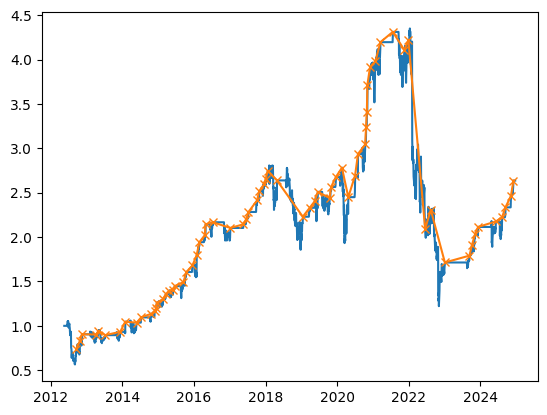

Average Holding Time: 28.89
average profit per trade: 0.02
annualized rar: 0.41


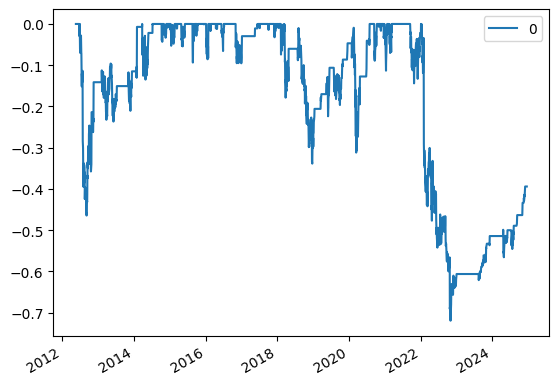

In [48]:
entry = None
pnl = None
pnls = []
dates = []
unrlzd = []
unrlzd_dates = []
hold_times = []
inpos = 0
for i in range(len(fb)):
    unr = (fb.iloc[i] - fb.iloc[i-1])/fb.iloc[i-1] * inpos
    unrlzd.append(unr)
    unrlzd_dates.append(fb.index[i])
    if inpos == 0 and rsi.iloc[i] < 50:
        # enter when index is less than 50
        entry = fb.iloc[i]
        inpos = 1
        start = fb.index[i]
    elif inpos == 1 and (rsi.iloc[i] > 55 or (fb.iloc[i] - entry)/entry < -0.5):
        # exit when index is greater than 55
        pnl = (fb.iloc[i] - entry)/entry
        pnls.append(pnl)
        inpos = 0
        dates.append(fb.index[i])
        hold_times.append((fb.index[i] - start).total_seconds())

analytics(dates, pnls, unrlzd_dates, unrlzd)

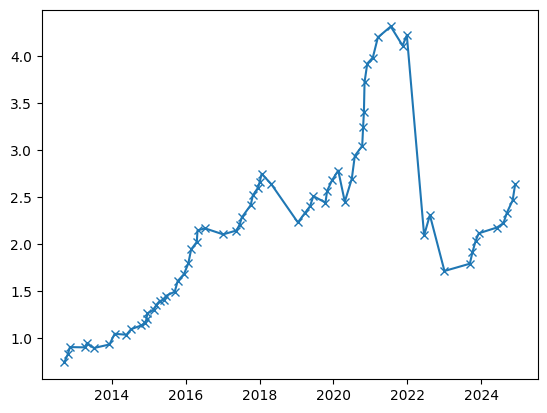

In [49]:
plt.plot(dates, np.nancumprod([1+x for x in pnls]), '-x')

Try to improve the strategy by changing its parameters and stop loss. Can you improve the backtest results significantly? (Note that the improved strategy will likely be overfitted.)

Create a plot, which includes the performance of your strategy against the benchmark (in this case buy-and-hold fb). Is your strategy better than the benchmark? 
Use the metrics function from above to evalute in which metrics your strategy outperforms the benchmark and where it underperforms.